# Homework week 12
6.6 (Gibbs sampling for a Poisson/gamma model).  
Suppose the vector of random variables $(X,Y)$ has the joint density function $f(x,y) = \frac{x^{a+y−1} * e^{\frac{−(1+b)x}{b}}} {\Gamma(a) * y! * b^a}$ , $x > 0,y = 0,1,2,...$ and we wish to simulate from this joint density.  
a.  Show that the conditional density $f(x|y)$ has a gamma density and identify the shape and rate parameters of this density.  
b.  Show that the conditional density $f(y|x)$ has a Poisson density.  
c.  Write a R function to implement Gibbs sampling when the constants are given by $a = 1$ and $b = 1$.  
d.  Using your R function, run 1000 cycles of the Gibbs sampler and from the output, display (say, by a histogram) the marginal probability mass function of $Y$ and compute $E(Y)$.  


# Bài làm  

a. **Conditional density $f(x | y)$:**

To find the conditional density $ f(x | y) $, we use the definition of conditional probability:

$f(x | y) = \frac{f(x,y)}{f_Y(y)}$

where $f_Y(y)$ is the marginal density of $Y$.

Given:
$f(x,y) = \frac{x^{a+y−1} * e^{\frac{−(1+b)x}{b}}} {\Gamma(a) * y! * b^a}$

The marginal density of $ Y $ is found by integrating $f(x,y)$ with respect to $x$:

$f_Y(y) = \int_{0}^{\infty} \frac{x^{a+y−1} * e^{\frac{−(1+b)x}{b}}} {\Gamma(a) * y! * b^a} dx$

This is the gamma distribution with shape parameter $a+y$ and rate parameter $\frac{1+b}{b}$.

Therefore, the conditional density $f(x | y)$ is a gamma density with parameters $a + y$ and $\frac{1+b}{b}$.

b. **Conditional density $f(y | x)$:**

To find the conditional density $f(y | x)$, we use the definition of conditional probability:

$f(y | x) = \frac{f(x,y)}{f_X(x)}$

Given:
$f(x,y) = \frac{x^{a+y−1} * e^{\frac{−(1+b)x}{b}}} {\Gamma(a) * y! * b^a}$

The marginal density of $ X $ is found by integrating $f(x,y)$ with respect to $y$:

$f_X(x) = \sum_{y=0}^{\infty} \frac{x^{a+y−1} * e^{\frac{−(1+b)x}{b}}} {\Gamma(a) * y! * b^a}$

$f_X(x) = \frac{x^{a-1} * e^{\frac{−(1+b)x}{b}}} {\Gamma(a) * b^a} \sum_{y=0}^{\infty} \frac{x^{y}} {y!}$

$f_X(x) = \frac{x^{a-1} * e^{\frac{−(1+b)x}{b}}} {\Gamma(a) * b^a} e^x$

$f_X(x) = \frac{x^{a-1} * e^{\frac{−bx}{b}}} {\Gamma(a) * b^a}$

$f_X(x) = \frac{x^{a-1} * e^{\frac{−x}{b}}} {\Gamma(a) * b^{a-1}}$

This is the gamma distribution with shape parameter $a$ and rate parameter $\frac{1}{b}$.

Therefore, the conditional density $f(y | x)$ is a Poisson density with parameter $\frac{x}{b}$.

c. **R function for Gibbs Sampling:**

```R
gibbs_sampling <- function(n_iter, a, b) {
  # Initializing vectors to store samples
  x <- numeric(n_iter)
  y <- numeric(n_iter)
  
  # Initialize the values of x and y
  x[1] <- rgamma(1, shape = a + 0, rate = (1 + b)/b)
  y[1] <- rpois(1, lambda = x[1]/b)
  
  for (i in 2:n_iter) {
    # Sample x from gamma distribution
    x[i] <- rgamma(1, shape = a + y[i-1], rate = (1 + b)/b)
    
    # Sample y from Poisson distribution
    y[i] <- rpois(1, lambda = x[i]/b)
  }
  
  # Return the samples
  return(data.frame(x = x, y = y))
}
```

d. **Running Gibbs Sampler and plotting histogram of $Y$:**

```R
# Set the constants
a <- 1
b <- 1
# Run Gibbs sampler
gibbs_samples <- gibbs_sampling(1000, a, b)

# Plot histogram of Y
hist(gibbs_samples$y, breaks = 20, main = "Histogram of Y", xlab = "Y", ylab = "Frequency")

# Compute E(Y)
mean_Y <- mean(gibbs_samples$y)
print(paste("E(Y) =", mean_Y))
```

This R code will run 1000 cycles of the Gibbs sampler, plot a histogram of the marginal probability mass function of $Y$, and compute $E(Y)$.

## Cụ thể kết quả code thu được là

### c

In [13]:
gibbs_sampling <- function(n_iter, a, b) {
    # Initializing vectors to store samples
    x <- numeric(n_iter)
    y <- numeric(n_iter)

    # Initialize the values of x and y
    x[1] <- rgamma(1, shape = a + 0, rate = (1 + b) / b)
    y[1] <- rpois(1, lambda = x[1] / b)

    for (i in 2:n_iter) {
        # Sample x from gamma distribution
        x[i] <- rgamma(1, shape = a + y[i - 1], rate = (1 + b) / b)

        # Sample y from Poisson distribution
        y[i] <- rpois(1, lambda = x[i] / b)
    }

    # Return the samples
    return(data.frame(x = x, y = y))
}


### d

[1] "E(Y) = 0.999"


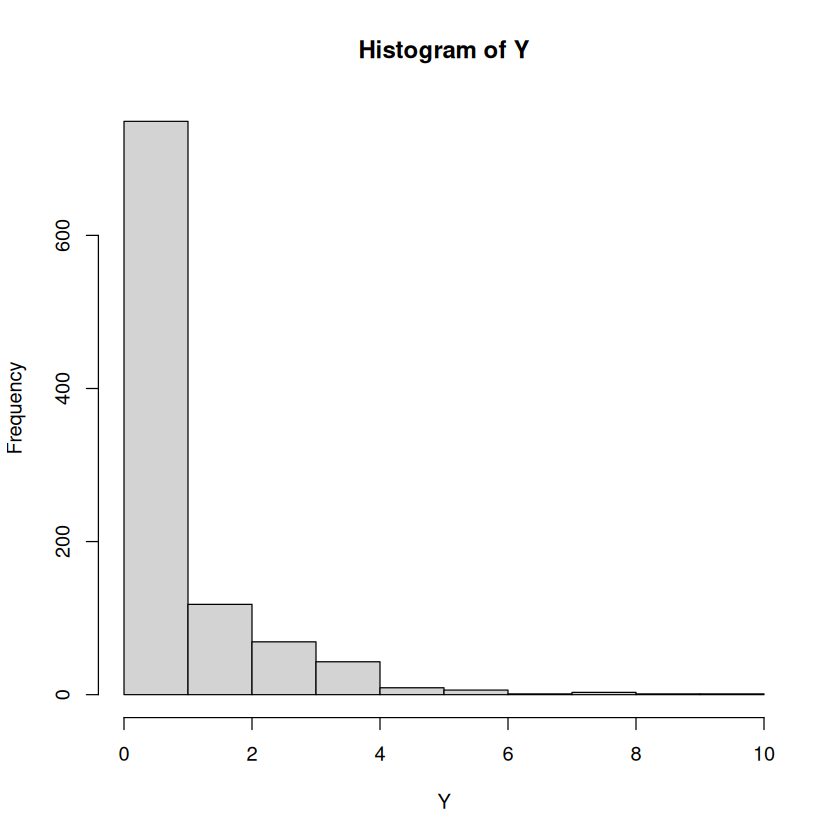

In [22]:
# Set the constants
a <- 1
b <- 1
# Run Gibbs sampler
gibbs_samples <- gibbs_sampling(1000, a, b)

# Plot histogram of Y
hist(gibbs_samples$y, breaks = 12, main = "Histogram of Y", xlab = "Y", ylab = "Frequency")

# Compute E(Y)
mean_Y <- mean(gibbs_samples$y)
print(paste("E(Y) =", mean_Y))


Cách viết hàm theo cách module hóa hơn

[1] "Expected value of Y: 0.984"


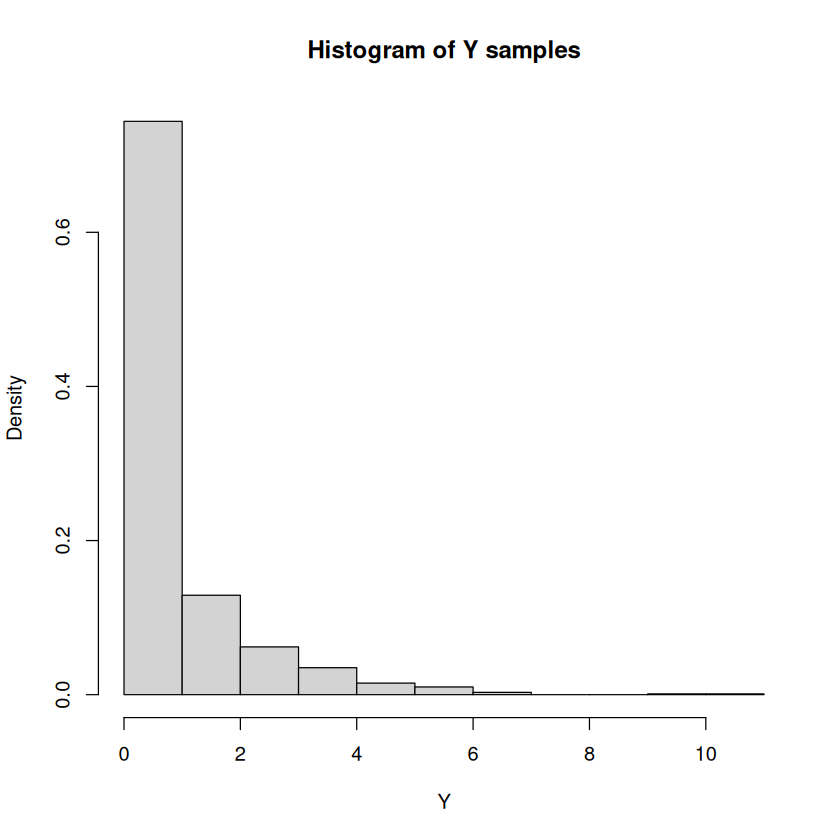

In [24]:
# Function to perform one iteration of Gibbs sampling
gibbs_iteration <- function(y, a, b) {
    # Sample x from its conditional distribution
    x <- rgamma(1, shape = a + y, rate = (1 + b)/b)

    # Sample y from its conditional distribution
    y <- rpois(1, lambda = x/b)

    return(list(x = x, y = y))
}

# Function to perform Gibbs sampling for specified number of iterations
gibbs_sampler <- function(n_iter, a, b) {
    # Initialize storage for samples
    samples <- matrix(0, nrow = n_iter, ncol = 2)

    # Initialize y
    y <- 0

    # Perform Gibbs sampling
    for (i in 1:n_iter) {
        sample <- gibbs_iteration(y, a, b)
        samples[i, ] <- unlist(sample)
        y <- sample$y
    }

    return(samples)
}

# Set constants
a <- 1
b <- 1

# Number of Gibbs sampler iterations
n_iter <- 1000

# Run Gibbs sampler
samples <- gibbs_sampler(n_iter, a, b)

# Extract samples of y
y_samples <- samples[, 2]

# Plot histogram of y samples
hist(y_samples, breaks = 10, freq = FALSE, main = "Histogram of Y samples", xlab = "Y")

# Compute expected value of Y
E_Y <- mean(y_samples)
print(paste("Expected value of Y:", E_Y))
